# Environment Analysis Class Usage

Welcome to RocketPy's Environment Analysis!

This notebook intends to present you a brief description of what is possible to be done by using the most recent class of RocketPy library. Analyzing weather historical data is of upmost importance for rocket launch operations, specially with regards to range closure decision which may impact safety and rocket flight performance, therefore the results presented here may be useful to support your launch operation design.

In this case we are going to use the Spaceport America location to perform an historical analysis over the last 20 years (i.e. from 2002 to 2021). However, Environment Analysis allows for both different location and time range to be analyzed as well.

## Initializing class and loading files

Let's start by importing the required libraries for our work:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [3]:
from rocketpy.EnvironmentAnalysis import EnvironmentAnalysis
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

The next cell will capture the dataset file previous donwloaded. For more details about how to get .nc files for another specific time and location, please consult the following thread:

In [4]:
env_analysis = EnvironmentAnalysis(
    start_date=datetime(2002, 6, 15), # (Year, Month, Day)
    end_date=datetime(2021, 6, 30), # (Year, Month, Day)
    start_hour=6,
    end_hour=17,
    latitude=32.990629, 
    longitude=-106.976097,
    surfaceDataFile="../../data/weather/spaceport_america_single_level_reanalysis_2002_2021.nc",
    pressureLevelDataFile="../../data/weather/spaceport_america_pressure_levels_reanalysis_2002_2021.nc",
    timezone="America/Denver",
    unit_system="imperial"
)

# Surface level Analysis

At this first section we are looking for at the surface level.
Data from surface analysis usually come with bigger amounts of information and therefore are important to give us a complete understanding of the scenario faced at the place and time that we are analysing.

## Average and record values

A good start on our analysis is by checking numerical values that are critical for the selected time range.

In [10]:
env_analysis.allInfo()

Pressure Information
Average Surface Pressure: 25.16 ± 0.08 inHg
Average Pressure at 1000 ft: 24.31 ± 0.07 inHg
Average Pressure at 10000 ft: 17.55 ± 0.07 inHg
Average Pressure at 30000 ft: 7.73 ± 0.07 inHg

Sustained Surface Wind Speed Information (33 ft above ground)
Historical Maximum Wind Speed: 28.04 mph
Historical Minimum Wind Speed: 0.14 mph
Average Daily Maximum Wind Speed: 10.82 mph
Average Daily Minimum Wind Speed: 2.67 mph

Elevated Wind Speed Information (328 ft above ground)
Historical Maximum Wind Speed: 37.37 mph
Historical Minimum Wind Speed: 0.07 mph
Average Daily Maximum Wind Speed: 13.57 mph
Average Daily Minimum Wind Speed: 3.91 mph

Wind Gust Information
Historical Maximum Wind Gust: 49.24 mph
Average Daily Maximum Wind Gust: 21.93 mph

Temperature Information
Historical Maximum Temperature: 103.77 degF
Historical Minimum Temperature: 59.55 degF
Average Daily Maximum Temperature: 93.70 degF
Average Daily Minimum Temperature: 70.97 degF

Precipitation Information
Pe

It's also important to look at the variation of temperature and wind distribution throught a typical day, which can be easily done by running the next code cells:

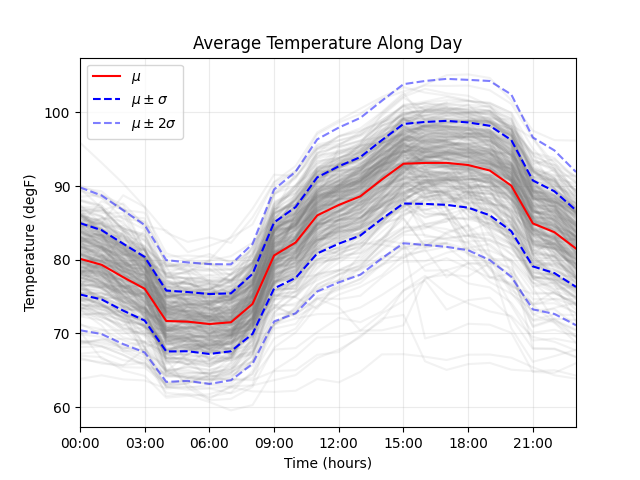

In [6]:
env_analysis.plot_average_temperature_along_day()

We can also take a look at sustained surface wind and wind gust plots!

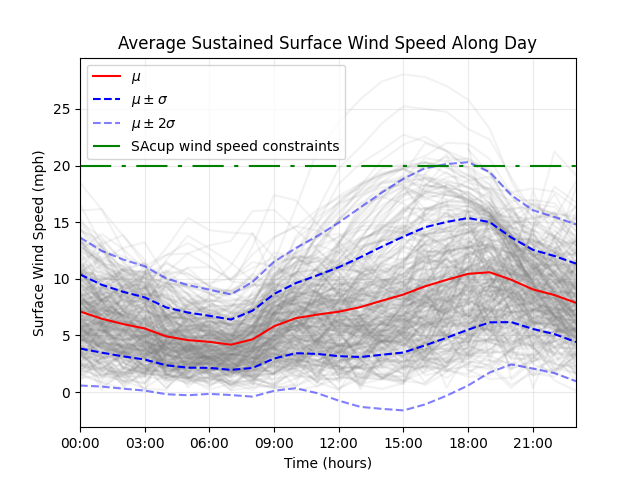

In [7]:
env_analysis.plot_average_surface10m_wind_speed_along_day(SAcup_wind_constraints=True)

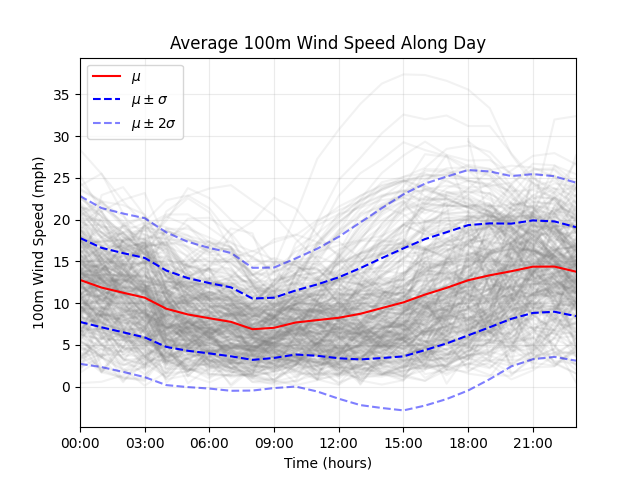

In [8]:
env_analysis.plot_average_sustained_surface100m_wind_speed_along_day()

In [9]:
env_analysis.animate_wind_gust_distribution_over_average_day()

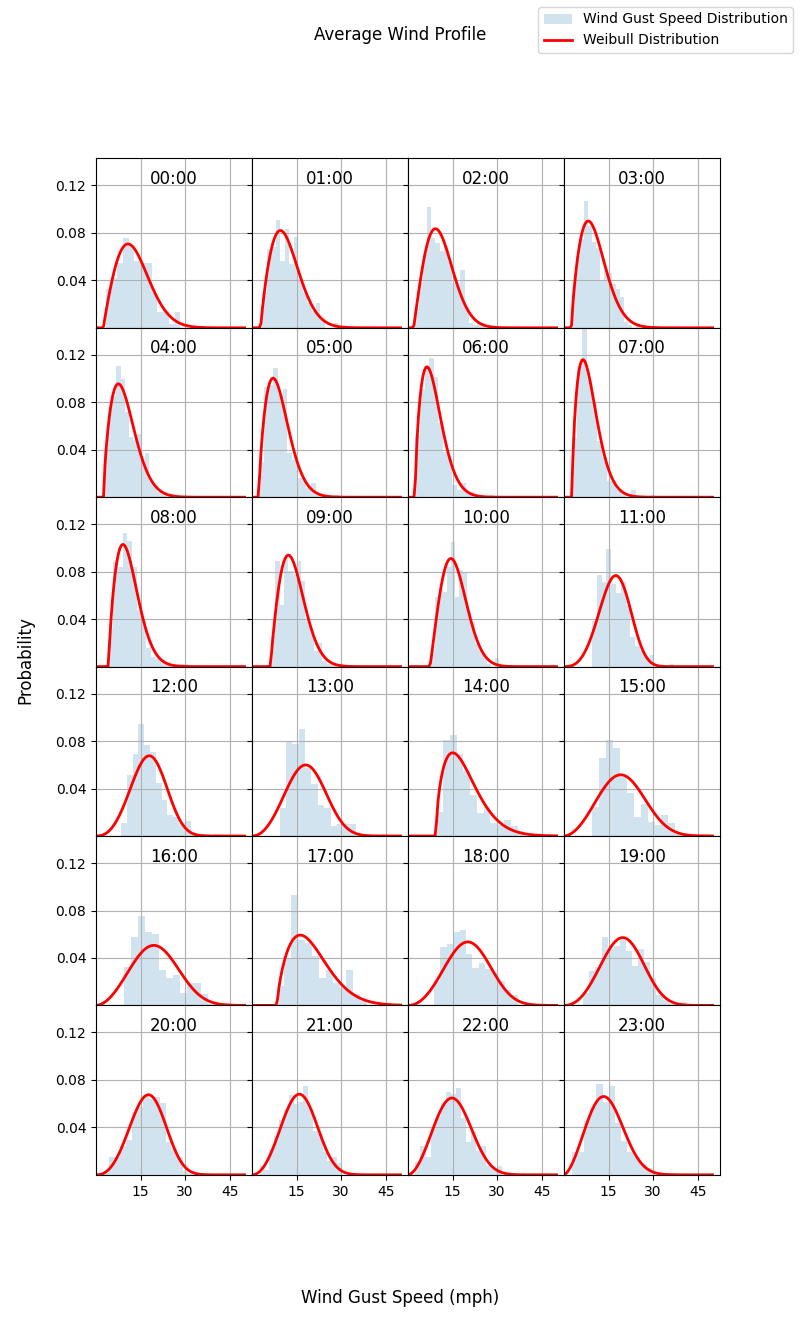

In [10]:
env_analysis.plot_wind_gust_distribution_over_average_day()

The next cell will plot wind gust distribution summarized by every date and every hour available in the source file 

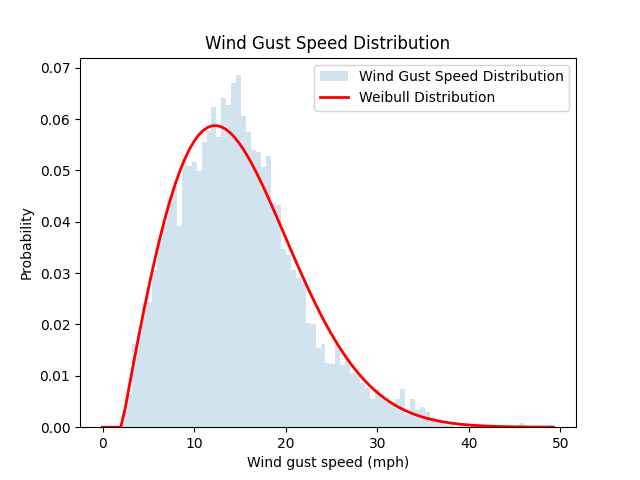

In [11]:
env_analysis.plot_wind_gust_distribution()

## Wind Roses

Finally, we can use the previous informations to generate a graphic known as Wind Rose. A Wind Rose is commonly used by meteorologists to identify how wind speed and direction are typically distributed at a particular location. Using a polar coordinate system of gridding, the frequency of winds over a time period is plotted by wind direction, with color bands showing wind speed ranges. These color bands follow the Beaufort wind force scale. The direction of the longest spoke shows the wind direction with the greatest frequency.

**Note**: Wind Roses plot wind direction, which means the **direction** from which the wind is blowing, not to be confused with wind **heading**, which is the direction to which the wind blows.

In [12]:
env_analysis.animate_average_wind_rose(filename="wind_rose.gif")

Image(value=b'GIF89a \x03 \x03\x87\x00\x00\xfe\xfe\xfe}\xfez\x00\xd4\xfe\xfe\xe5\x00\xb3\xb4\xb3\xe6\xe7\xe7\x…

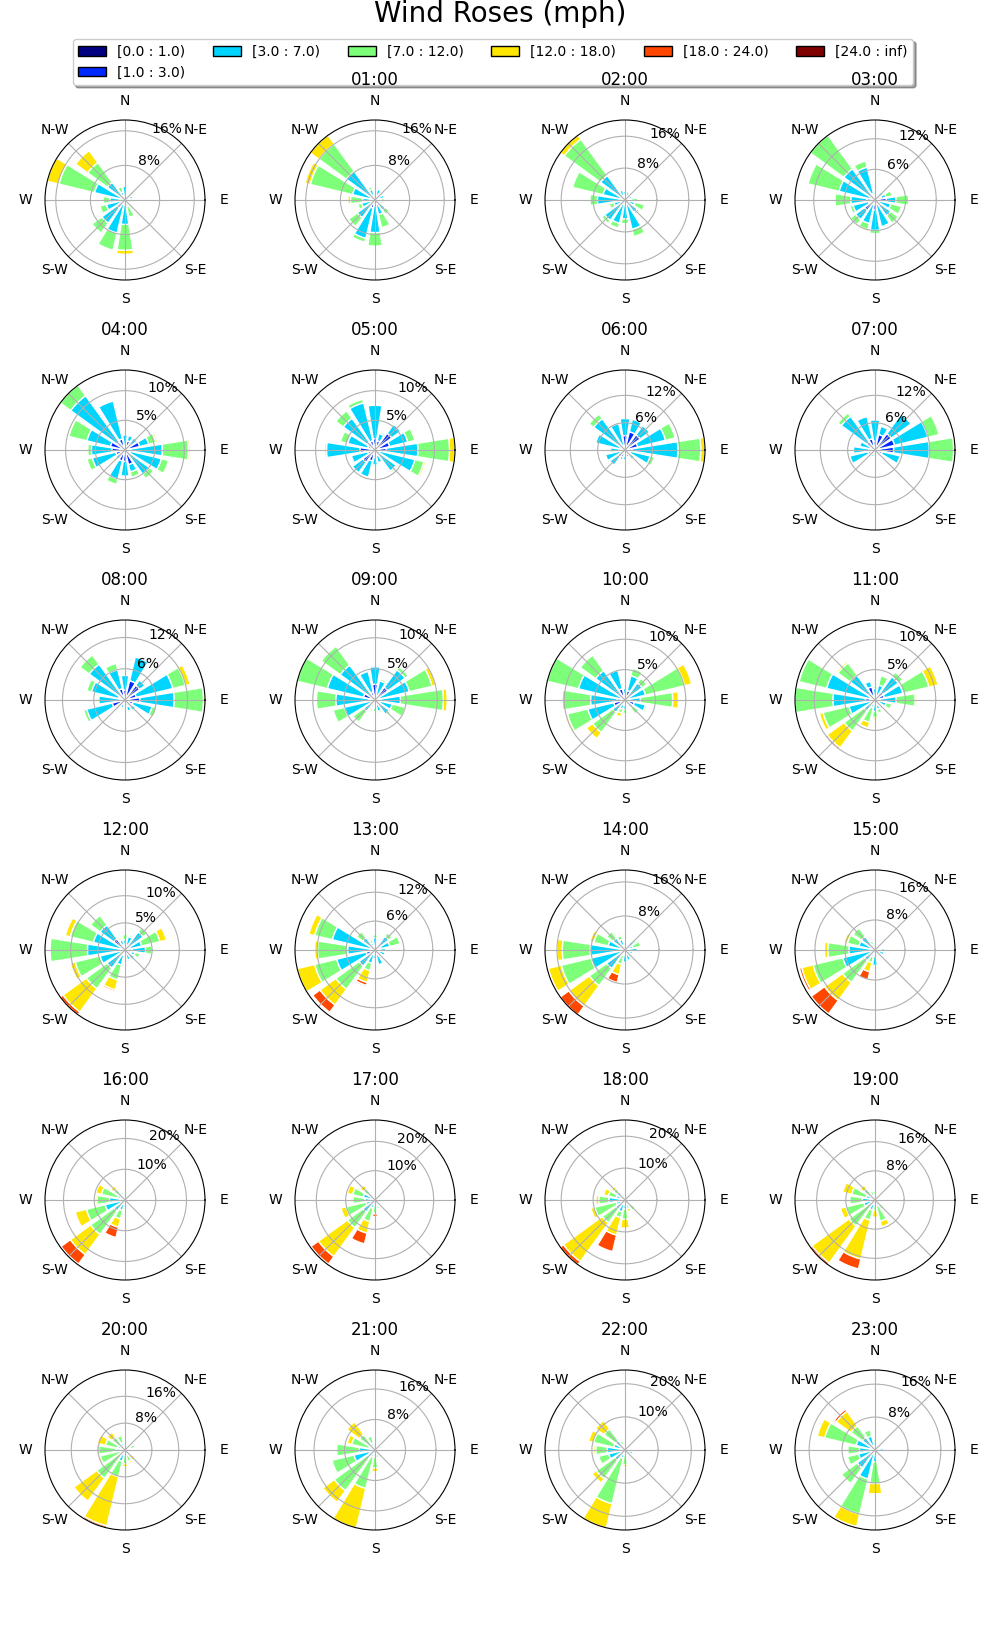

In [13]:
env_analysis.plot_average_day_wind_rose_all_hours()

In [14]:
#In case you need to plot only a singe windrose with regards to a specific hour
#env_analysis.plot_average_day_wind_rose_specific_hour() #TODO: example input format of specific hour

# Pressure Level Analysis

At this section, we guide our analysis through pressure profile data available on our dataset.
It means we are now stopping to see just surface information and start better understaand how the meteorology varies while the altitude increases.

## Average wind profiles

Moreover, we can see an animation of how the wind speed profile varies during an average day at Spaceport Location:

In [15]:
env_analysis.animate_wind_profile_over_average_day(SAcup_altitude_constraints=True)

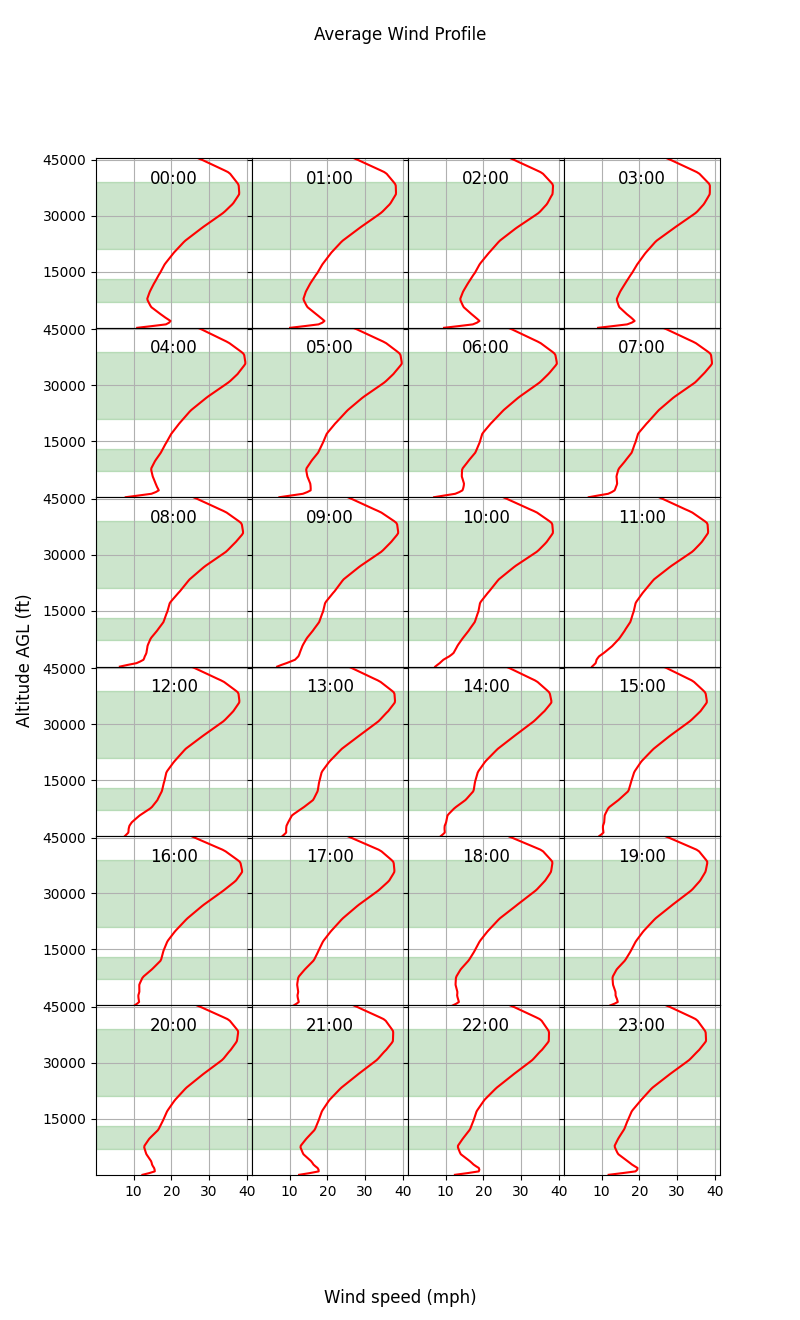

In [16]:
env_analysis.plot_wind_profile_over_average_day(SAcup_altitude_constraints=True)

Finally, the average wind speed profile can be summarized by every date end hour available in our source file:

<module 'matplotlib.pyplot' from 'c:\\Users\\GiovaniCeotto\\.conda\\envs\\rocketpy_dev\\lib\\site-packages\\matplotlib\\pyplot.py'>


c:\Users\GiovaniCeotto\.conda\envs\rocketpy_dev\lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


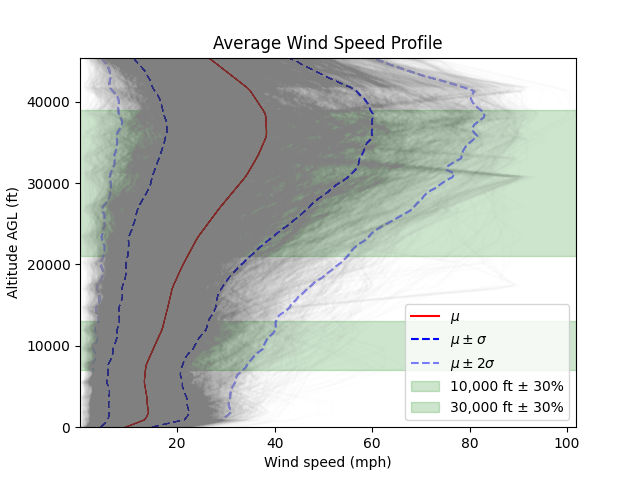

In [17]:
env_analysis.plot_average_wind_speed_profile(SAcup_altitude_constraints=True)

# Going further with your analysis

The best part of using Python is the flexibility, therefore it's important to highlight that other different experimental and data analysis can be done using EnvironmentAnalysis.
For instance, you could ask yourself about historical cloud celling height or any other information available in the source file.
Here are some different analysis we could mention:

- totalPrecipitation
- cloudBaseHeight
- surfacePressure
- Temperature profile

In the next code we exemplify an analysis regarding temperature profile

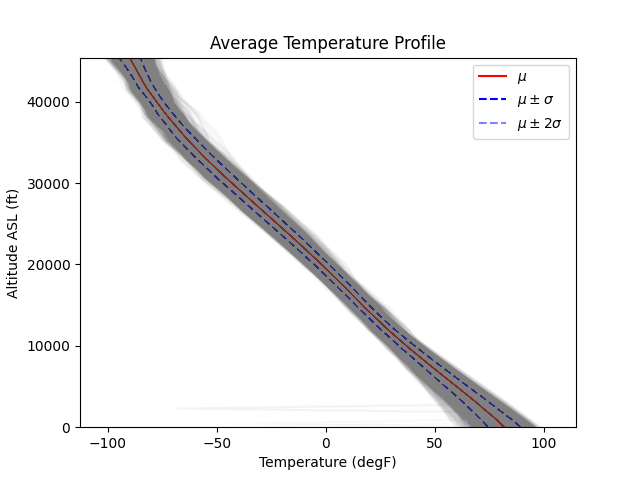

In [18]:
altitude_list = np.linspace(*env_analysis.altitude_AGL_range, 100)
temperature_profiles = [
    dayDict[hour]["temperature"](altitude_list)
    for dayDict in env_analysis.pressureLevelDataDict.values()
    for hour in dayDict.keys()
]
env_analysis.average_temperature_profile = np.mean(temperature_profiles, axis=0)
# Plot
plt.figure()
plt.plot(env_analysis.average_temperature_profile, altitude_list, "r", label="$\\mu$")
plt.plot(
    np.percentile(temperature_profiles, 50 - 34.1, axis=0),
    altitude_list,
    "b--",
    alpha=1,
    label="$\\mu \\pm \\sigma$",
)
plt.plot(
    np.percentile(temperature_profiles, 50 + 34.1, axis=0),
    altitude_list,
    "b--",
    alpha=1,
)
plt.plot(
    np.percentile(temperature_profiles, 50 - 47.4, axis=0),
    altitude_list,
    "b--",
    alpha=0.5,
    label="$\\mu \\pm 2\\sigma$",
)
plt.plot(
    np.percentile(temperature_profiles, 50 + 47.7, axis=0),
    altitude_list,
    "b--",
    alpha=0.5,
)
for temperature_profile in temperature_profiles:
    plt.plot(temperature_profile, altitude_list, "gray", alpha=0.01)
plt.ylim(altitude_list[0], altitude_list[-1])
plt.xlabel(f"Temperature ({env_analysis.unit_system['temperature']})")
plt.ylabel(f"Altitude ASL ({env_analysis.unit_system['length']})")
plt.title("Average Temperature Profile")
plt.legend()
plt.show()

## Exporting this notebook

In [ ]:
!jupyter nbconvert environment_analysis_class_usage.ipynb --to html --output env_analysis_output.html